Using Mean Normalization

In [1]:
#IMPORTING REQUIRED LIBRARIES
import numpy as np                #Required for computation
import pandas as pd               #Required to handle Data
import matplotlib.pyplot as plt   #Required to visualize the plots
%matplotlib inline

In [2]:
#User defined variables

iterations = 100
alpha = 1
theta = np.array([-1, 4])[:, np.newaxis]
theta

array([[-1],
       [ 4]])

In [3]:
#Creating a function to compute cost

def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)

In [4]:
#Creating a function for gradient descend

costHist = np.zeros([iterations+1, 1])
def gradientDescent(X, y, theta, alpha, iterations):
    for i in range(iterations):
        costHist[i] = computeCost(X, y, theta)
        temp = np.dot(X, theta) - y                      # np.dot - dot product
        temp = np.dot(X.T, temp)                         # T - transpose
        theta = theta - (alpha/m) * temp
    return theta

In [5]:
#Creating a function for Prediction

def h_predict(x_sqft, theta):
    h_predict = y_std * (theta[0] + theta[1] * (x_sqft - X_mean)/X_std) + y_mean
    return h_predict

In [6]:
#Redaing the data
data = pd.read_csv("50_Startups.csv")

In [7]:
#Head and info the data
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [9]:
#Extracting specific columns for the regression

X = data.iloc[:, 2]                                # read 2nd column
y = data.iloc[:, 4]                                # read 4th column
m = len(y)                                         # number of training example 

In [10]:
print(X)

0     471784.10
1     443898.53
2     407934.54
3     383199.62
4     366168.42
5     362861.36
6     127716.82
7     323876.68
8     311613.29
9     304981.62
10    229160.95
11    249744.55
12    249839.44
13    252664.93
14    256512.92
15    261776.23
16    264346.06
17    282574.31
18    294919.57
19         0.00
20    298664.47
21    299737.29
22    303319.26
23    304768.73
24    140574.81
25    137962.62
26    134050.07
27    353183.81
28    118148.20
29    107138.38
30     91131.24
31     88218.23
32     46085.25
33    214634.81
34    210797.67
35    205517.64
36    201126.82
37    197029.42
38    185265.10
39    174999.30
40    172795.67
41    164470.71
42    148001.11
43     35534.17
44     28334.72
45      1903.93
46    297114.46
47         0.00
48         0.00
49     45173.06
Name: Marketing Spend, dtype: float64


In [11]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [12]:
#Normalizing the data

X_mean = X.mean()
X_std = X.std()
X = (X - X_mean) / X_std

y_mean = y.mean()
y_std = y.std()
y = (y - y_mean) / y_std

In [13]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
ones = np.ones((m,1))
X = np.hstack((ones, X))

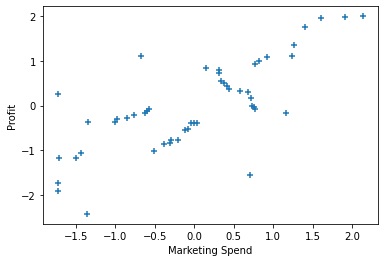

In [14]:
#Initial Visualization of the Data

plt.scatter(X[:, 1], y, marker = '+')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.show()

In [15]:
#Compute the cost
J = computeCost(X, y, theta)
print(J)

5.898758370773412


In [16]:
#implement the gradient descend
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[-3.19744231e-16]
 [ 7.47765722e-01]]


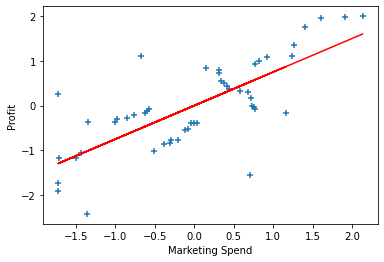

In [17]:
#visualize the linear Regression Line

plt.scatter(X[:,1], y, marker = '+' )
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')
plt.plot(X[:,1], np.dot(X, theta), 'r')
plt.show()

(0.0, 25.0, 0.0, 20.0)

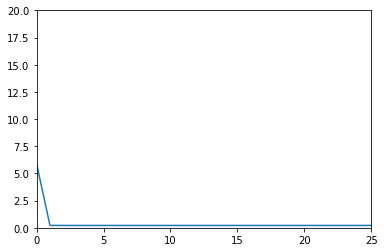

In [18]:
#This is the cost 
plt.plot(costHist)
plt.axis([0, 25, 0, 20])

In [19]:
#Predicting the value

h_predict(150000, theta)

array([96972.43848324])